# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 8 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook (colab):

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

## Важно

Перед отправкой проверьте, что весь ваш код выполняется без ошибок, если во время проверки после последовательного перезапуска ячеек что-то пойдет не так, то задание может быть оценено в 0 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
%config InlineBackend.figure_format="retina"  # only for retina display

Зафиксируем `seed` для воспроизводимости.

In [2]:
seed = 42
np.random.seed(seed)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = 1e4
theta = 10

uniform_sample = sps.uniform(scale=theta).rvs(size=int(N), random_state=seed)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [4]:
n_arr = np.arange(1, N+1)
means = np.cumsum(uniform_sample) / n_arr
first_order_stat = np.minimum.accumulate(uniform_sample)
last_order_stat = np.maximum.accumulate(uniform_sample)

first_estim = 2 * means
second_estim = means + last_order_stat / 2
third_estim = (n_arr + 1) * first_order_stat
fourth_estim = first_order_stat + last_order_stat
fifth_estim = (n_arr + 1) / n_arr * last_order_stat

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки лучше соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

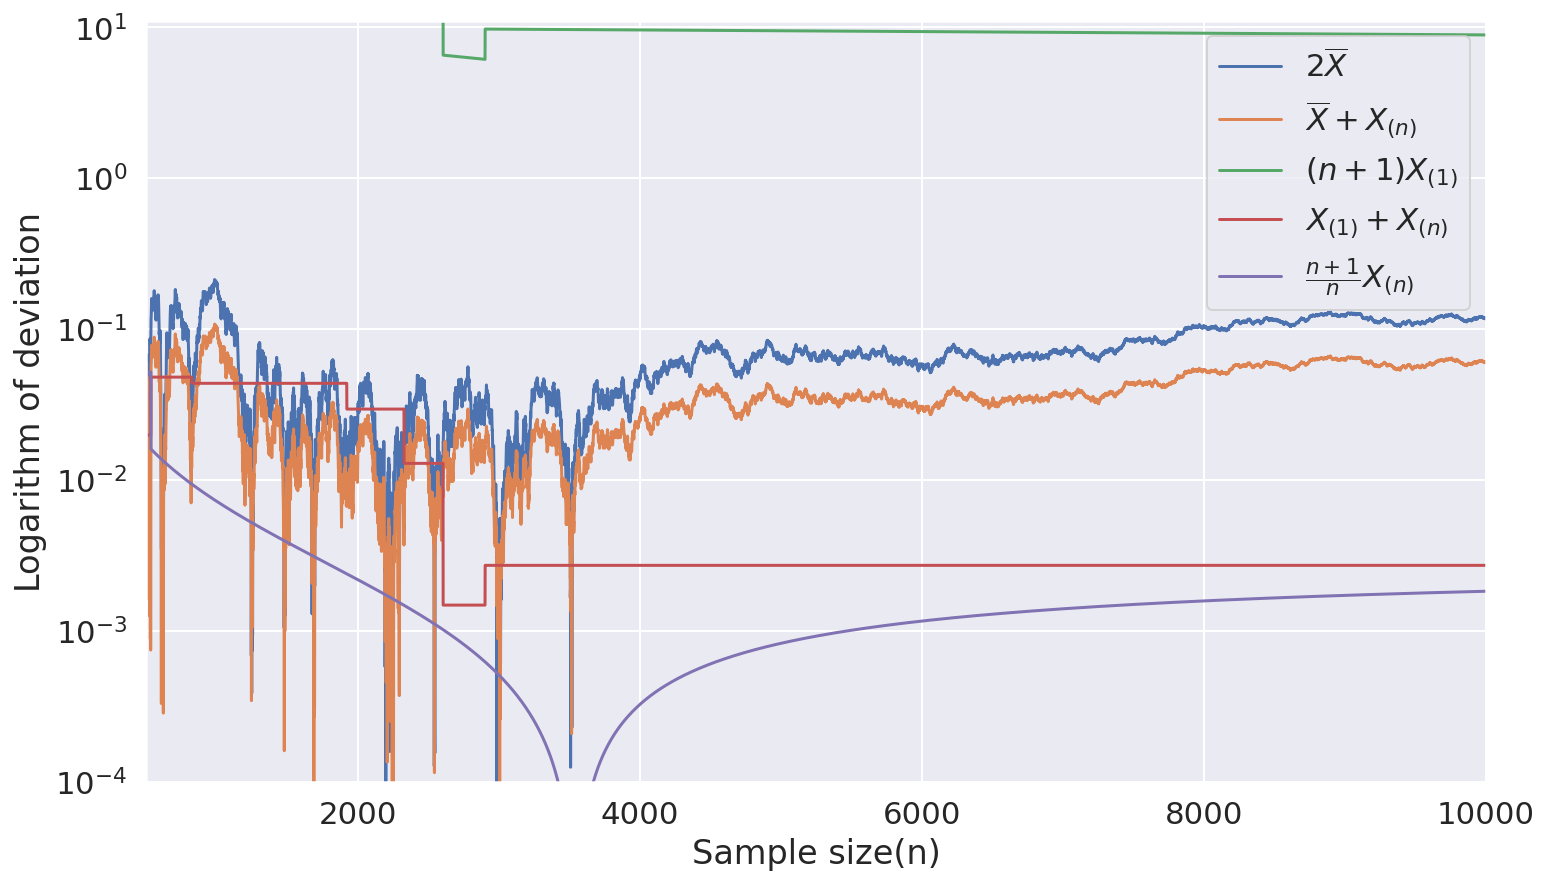

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))

plt.plot(n_arr, np.abs(first_estim - theta), label='$2\overline{X}$')
plt.plot(n_arr, np.abs(second_estim - theta), label='$\overline{X} + X_{(n)}$')
plt.plot(n_arr, np.abs(third_estim - theta), label='$(n+1)X_{(1)}$')
plt.plot(n_arr, np.abs(fourth_estim - theta), label='$X_{(1)}+X_{(n)}$')
plt.plot(n_arr, np.abs(fifth_estim - theta), label="$\\frac{n+1}{n} X_{(n)}$")

plt.xlim((500, int(N)))
plt.ylim((10**-4, 11))
plt.yscale('log')
plt.xlabel('Sample size(n)')
plt.ylabel('Logarithm of deviation')
plt.legend()
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ $\frac{n+1}{n} X_{(n)}$



Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

In [6]:
def get_uniform_sample(theta):
    return sps.uniform(scale=theta).rvs(size=int(N), random_state=seed)


def get_estimations(sample):
    n_arr = np.arange(1, N+1)
    means = np.cumsum(sample) / n_arr
    first_order_stat = np.minimum.accumulate(sample)
    last_order_stat = np.maximum.accumulate(sample)

    first_estim = 2 * means
    second_estim = means + last_order_stat / 2
    third_estim = (n_arr + 1) * first_order_stat
    fourth_estim = first_order_stat + last_order_stat
    fifth_estim = (n_arr + 1) / n_arr * last_order_stat
    
    return [first_estim, second_estim, third_estim, fourth_estim, fifth_estim]


def plot_estimations(estims, theta):
    n_arr = np.arange(1, N+1)
    plt.figure(figsize=(12, 7))

    plt.plot(n_arr, np.abs(estims[0] - theta), label='$2\overline{X}$')
    plt.plot(n_arr, np.abs(estims[1] - theta), label='$\overline{X} + X_{(n)} / 2$')
    plt.plot(n_arr, np.abs(estims[2] - theta), label='$(n+1)X_{(1)}$')
    plt.plot(n_arr, np.abs(estims[3] - theta), label='$X_{(1)}+X_{(n)}$')
    plt.plot(n_arr, np.abs(estims[4] - theta), label="$\\frac{n+1}{n} X_{(n)}$")

    plt.xlim((500, int(N)))
    #plt.ylim((10**-4, 11))
    plt.title("Theta = %d" %theta)
    plt.yscale('log')
    plt.xlabel('Sample size(n)')
    plt.ylabel('Logarithm of deviation')
    plt.legend()
    plt.show()

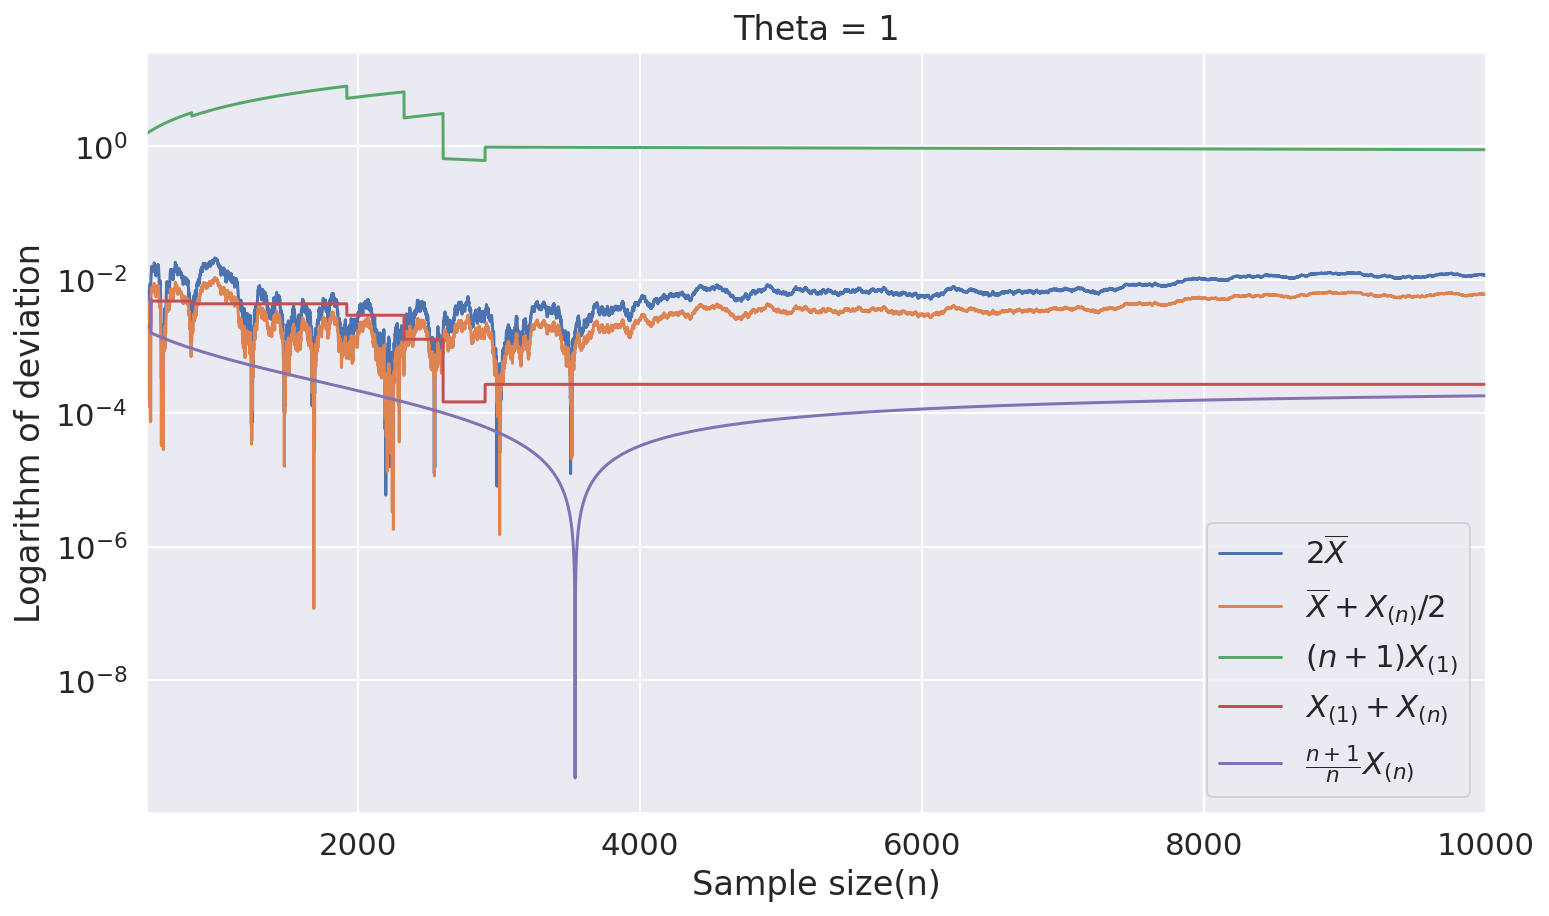

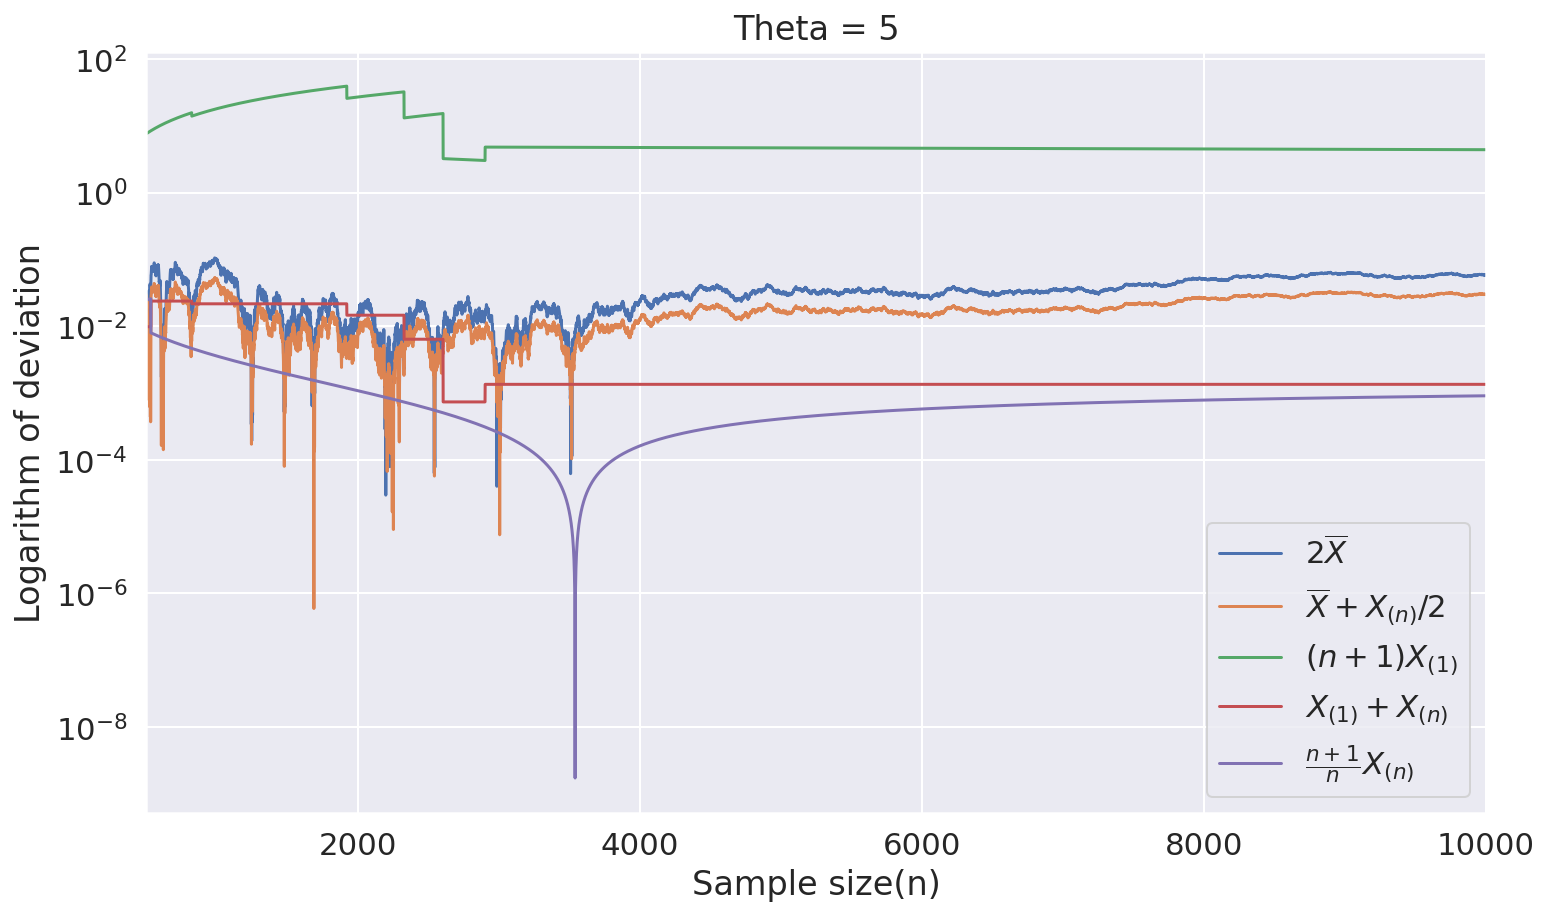

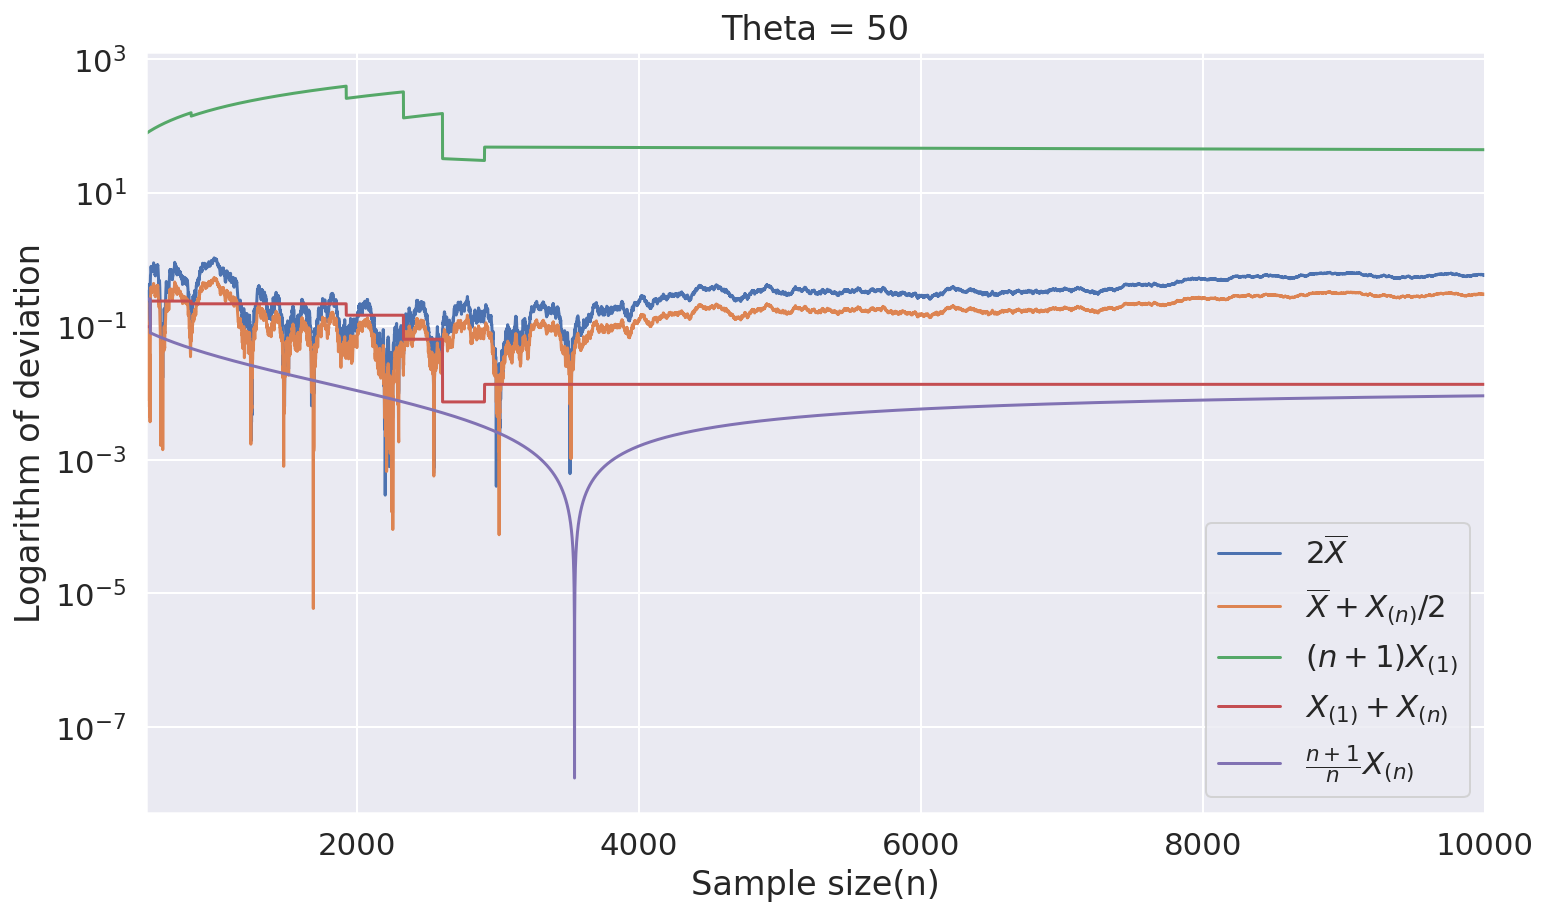

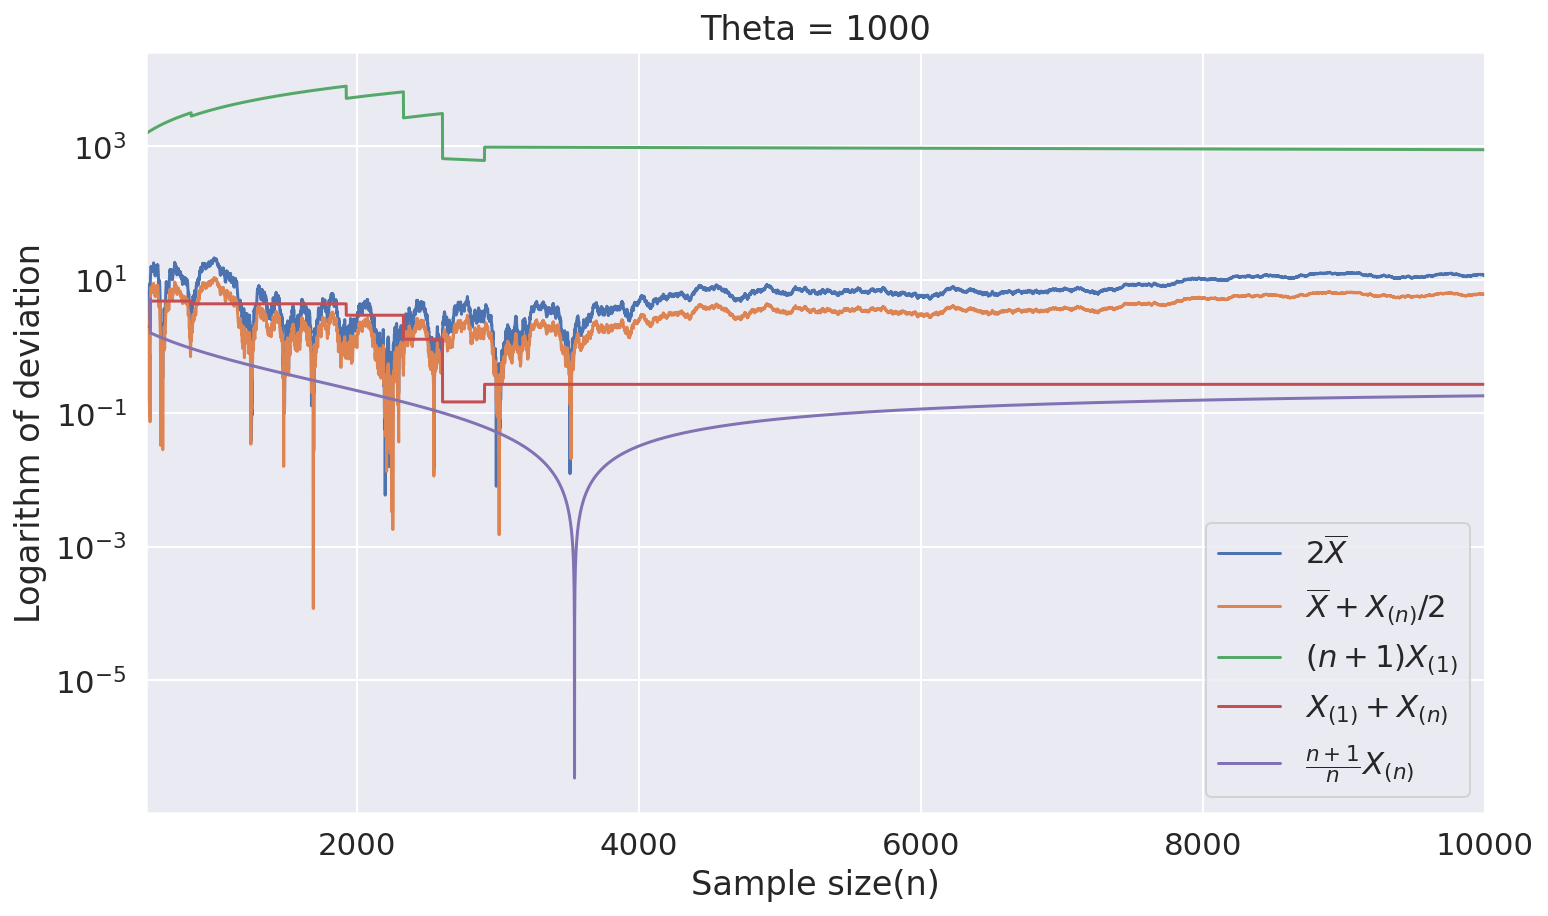

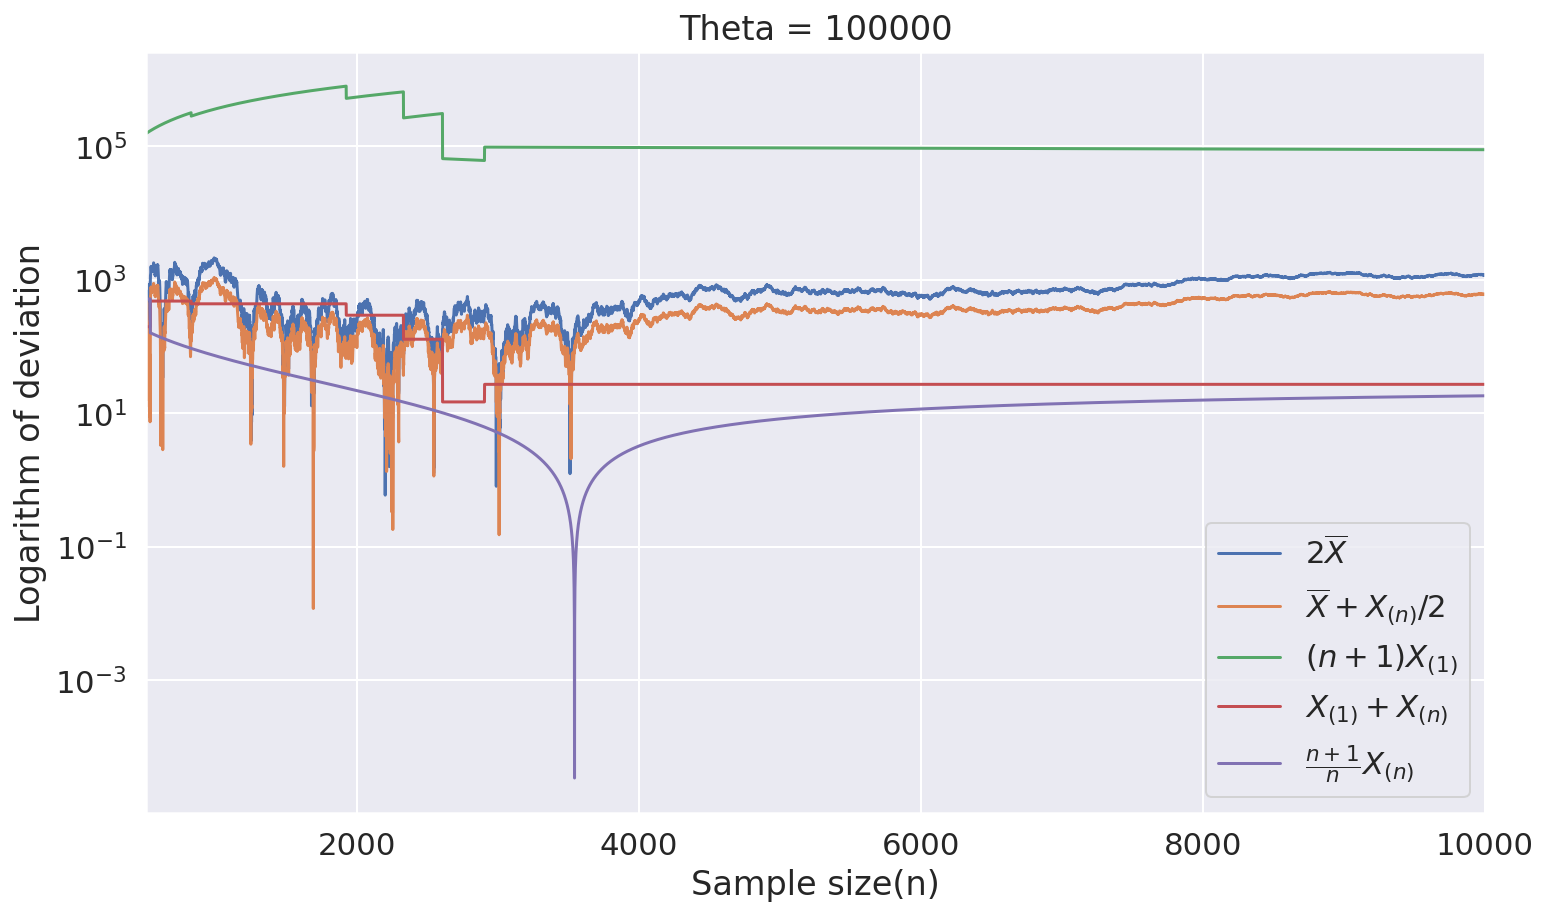

In [7]:
for theta in [1, 5, 50, 1000, 100000]:
    theta_sample = get_uniform_sample(theta)
    theta_estims = get_estimations(theta_sample)
    plot_estimations(theta_estims, theta)

Сделайте вывод.


__Вывод:__ 

Экспериментальным путём получили, что бОльшее отклонение от параметра $\theta$ имеет оценка $(n+1) X_{(n)}$. Это связано с тем, что данная оценка не является сильно состоятельной, в то время как другие являются.    
Далее в порядке убывания модуля отклонения следуют $2\overline{X}, \; \overline{X} + X_{(n)}/ 2$.  
Оценки $X_{(1)}+X_{(n)} \text{ и } \frac{n+1}{n} X_{(n)}$ имеют наименьшее отклонение среди данных оценок, причём у них приблизительно схожие отклонения, а для статистики $\frac{n+1}{n} X_{(n)}$ характерны своего рода "выбросы", связанные с увеличением $X_{(n)}$ - порядок модуля отклонения может резко упасть на несколько порядков и так же резко подняться обратно. В то же время график отклонения статистики $X_{(1)}+X_{(n)}$ имеет ступенчатый вид и не обладает резкими скачками за счёт того, что рост $X_{(n)}$ компенсируется убыванием $X_{(1)}$. 

### Задача 2

Придумайте распределение, у которого конечны первые два момента, а третий – нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

**Решение:** Возьмём дискретное распределение, принимающее натуральные значения, причём 
$P(\xi = n) = \dfrac{1}{n^4} \cdot \dfrac{90}{\pi^4} \;\; \forall n \in N$  
Тогда получаем, что $E\xi^\alpha$ конечен при $\alpha < 3$ и неопределён при $\alpha \geqslant 3$

In [8]:
APERY_CONST = 1.20205690316 # sum of series 1/n^3
NORMALIZING_SCALAR = 90 / np.pi ** 4
MY_DISTR_MEAN = APERY_CONST * NORMALIZING_SCALAR
MY_DISTR_SND_MOMENT = 15 / np.pi ** 2

In [9]:
rv_discrete_base = sps.rv_discrete(a=1, seed=seed)

class my_distr(sps.rv_discrete):
    "Discrete distribution such that"
    "P(X = n) = 1/n^4 * 90/pi^4"
    def __init__(self):
        super().__init__(a=1, seed=seed)
        
        
    def _pmf(self, k):
        return (1.0 / (k ** 4) * NORMALIZING_SCALAR)
                
    
    def _moment(self, n):
        if n == 1:
            return MY_DISTR_MEAN
        elif n == 2:
            return MY_DISTR_SND_MOMENT
        return np.inf
    
    
    def _mean(self):
        return MY_DISTR_MEAN
    
    
    def _var(self):
        return MY_DISTR_SND_MOMENT - MY_DISTR_MEAN ** 2
    
    
my_distr_sample = my_distr().rvs(size=int(N))

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

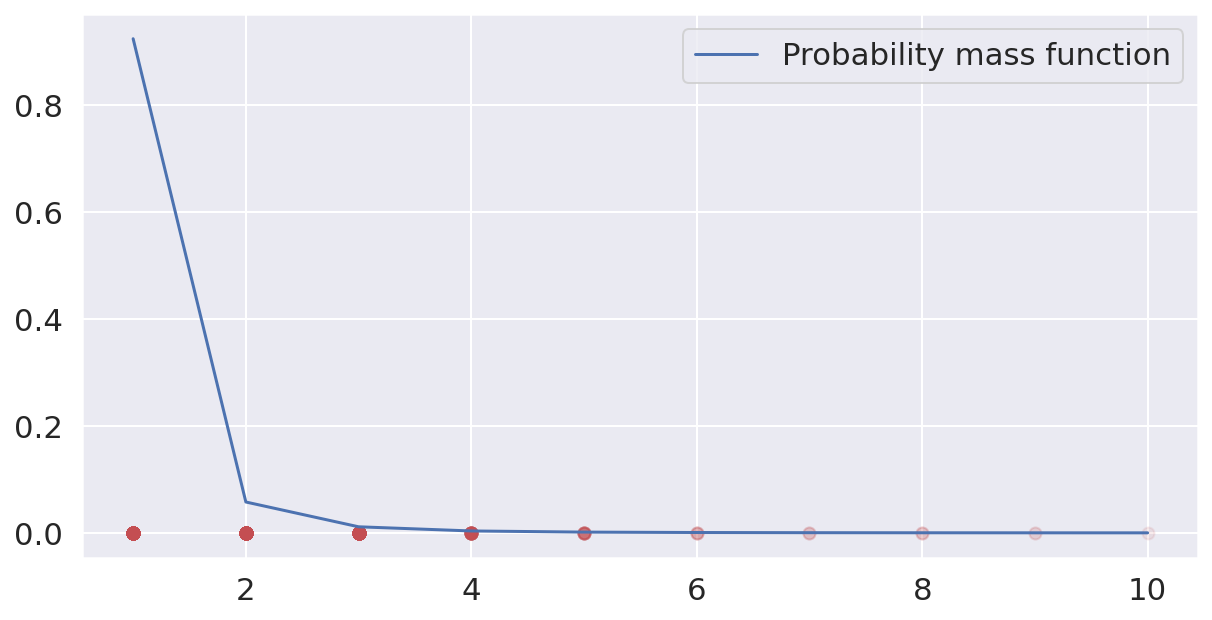

In [10]:
xticks = np.arange(1, 11)

plt.figure(figsize=(10, 5))
plt.scatter(my_distr_sample, y=np.zeros(my_distr_sample.size), alpha=0.1, color='r')
plt.plot(xticks, my_distr().pmf(xticks), label="Probability mass function")

plt.yscale('linear')
plt.legend()
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

In [11]:
def get_n_estimated_var(sample):
    n_arr = np.arange(1, sample.size+1)
    square_of_mean = np.square(np.cumsum(sample) / n_arr)
    sample_snd_moment = np.cumsum(np.square(sample)) / n_arr
    return sample_snd_moment - square_of_mean

/home/eduard/anaconda3/envs/python/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:3558: RuntimeWarning: expect(): sum did not converge
  warnings.warn('expect(): sum did not converge', RuntimeWarning)


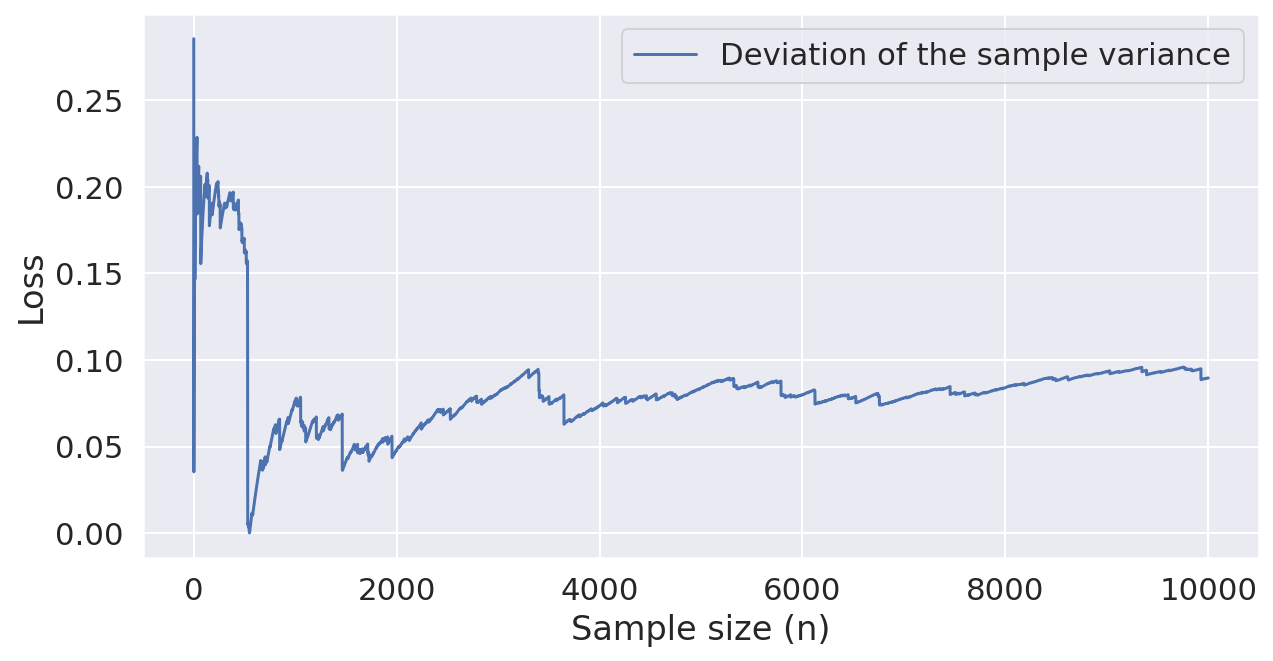

In [12]:
n_arr = np.arange(1, N+1)
distr_var = my_distr().var()
sample_n_var = get_n_estimated_var(my_distr_sample)

plt.figure(figsize=(10, 5))
plt.plot(n_arr, np.abs(sample_n_var - distr_var), 
            label="Deviation of the sample variance")
plt.xlabel("Sample size (n)")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Вывод:** Для данного распределения убедились в смещённости оценки $S^2$ для дисперсии

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


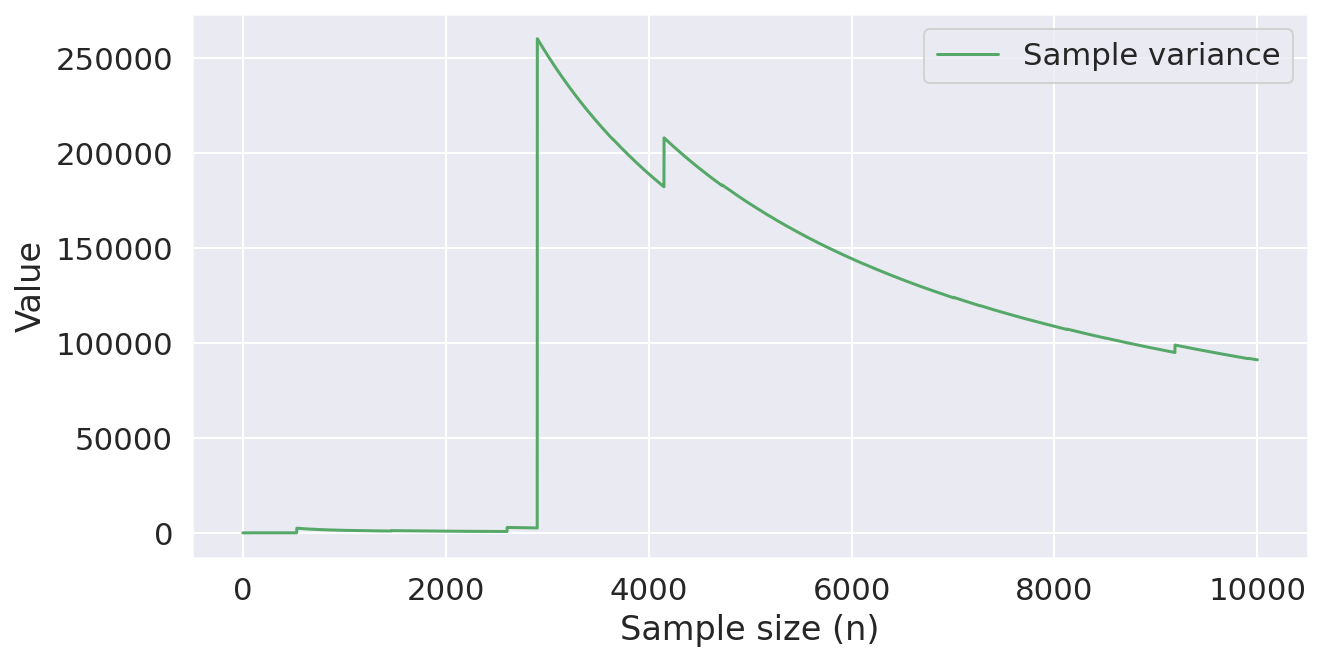

In [13]:
cauchy_sample = sps.cauchy().rvs(size=int(N), random_state=seed)
cauchy_mean = cauchy_sample.mean()
cauchy_sample_var = np.cumsum(np.square(cauchy_sample - cauchy_mean)) / n_arr

plt.figure(figsize=(10, 5))
plt.plot(n_arr, cauchy_sample_var, color='g', label="Sample variance")
plt.xlabel("Sample size (n)")
plt.ylabel("Value")
plt.legend()
plt.show()

**Вывод:** В силу несуществования дисперсии у распределения Коши, получили, что выборочная дисперсия принимает сколь угодно большое значение

### Задача 3

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [14]:
snd_obj = sps.norm() # standard normal distribution object
norm_sample = snd_obj.rvs(size=int(N), random_state=seed)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [15]:
# EDF - Empirical distribution function
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

edf_arr = []
for i in range(1, int(N) + 1):
    edf_arr.append(ECDF(norm_sample[:i]))

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

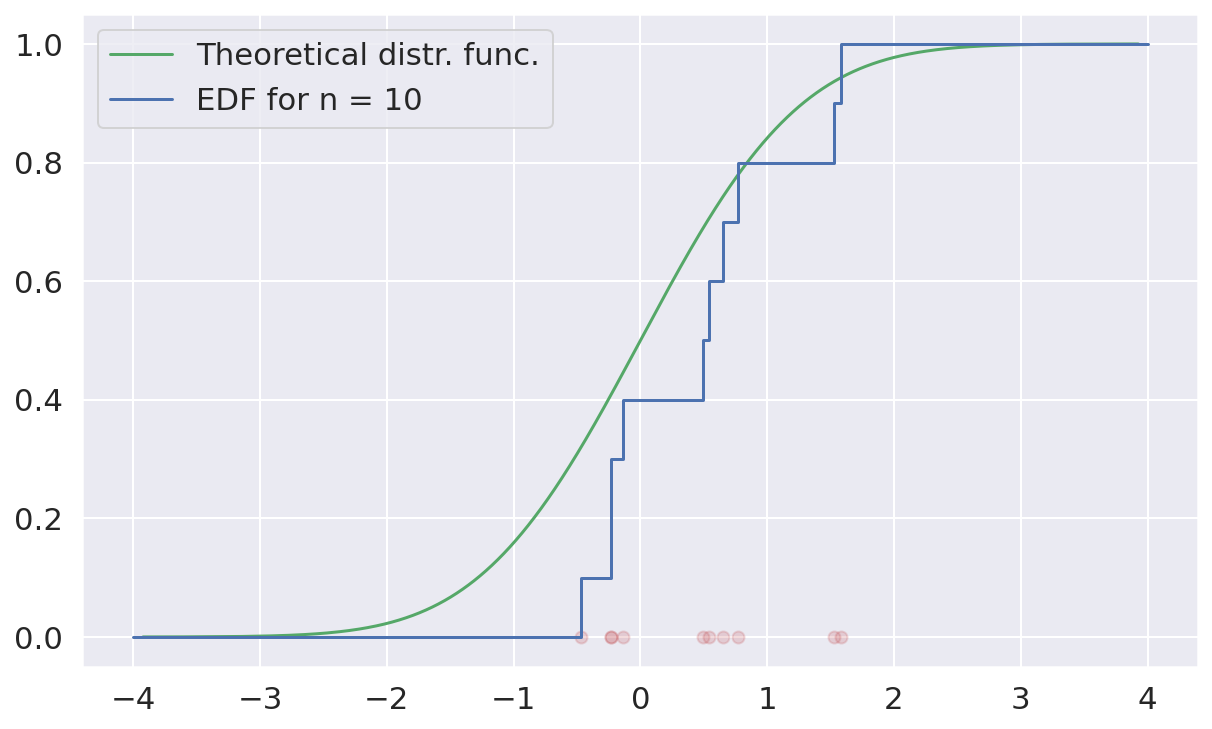

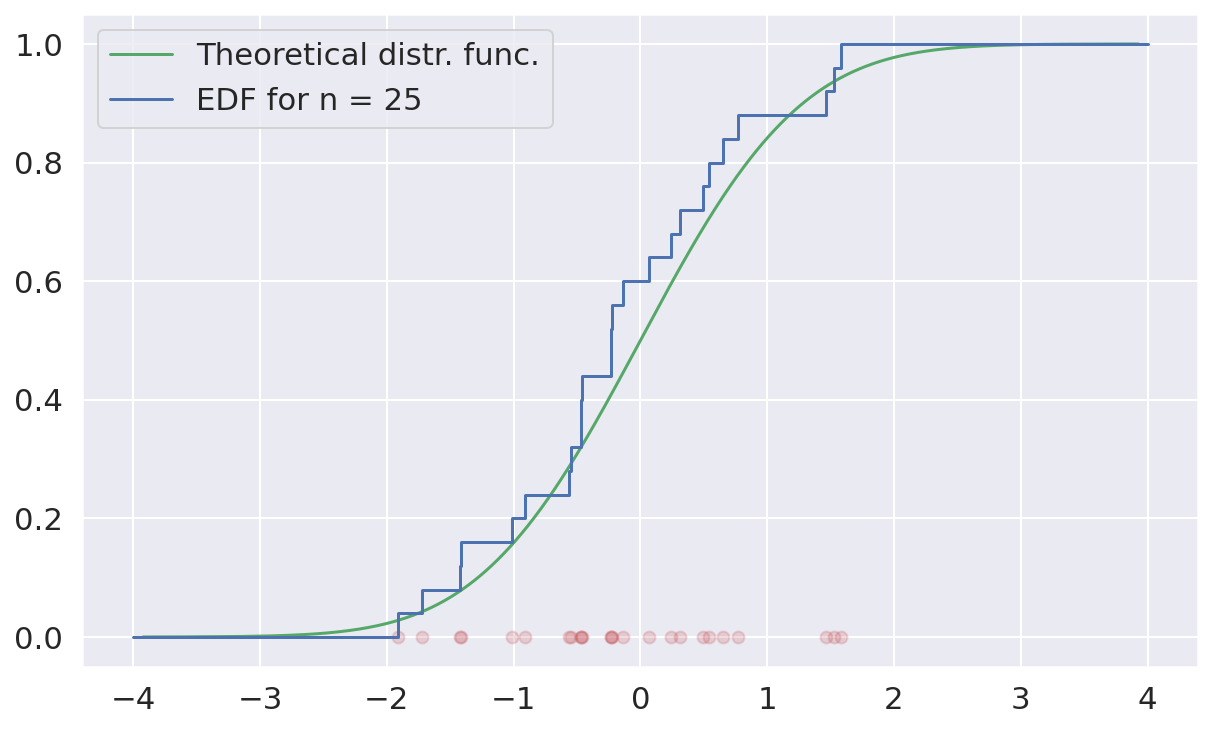

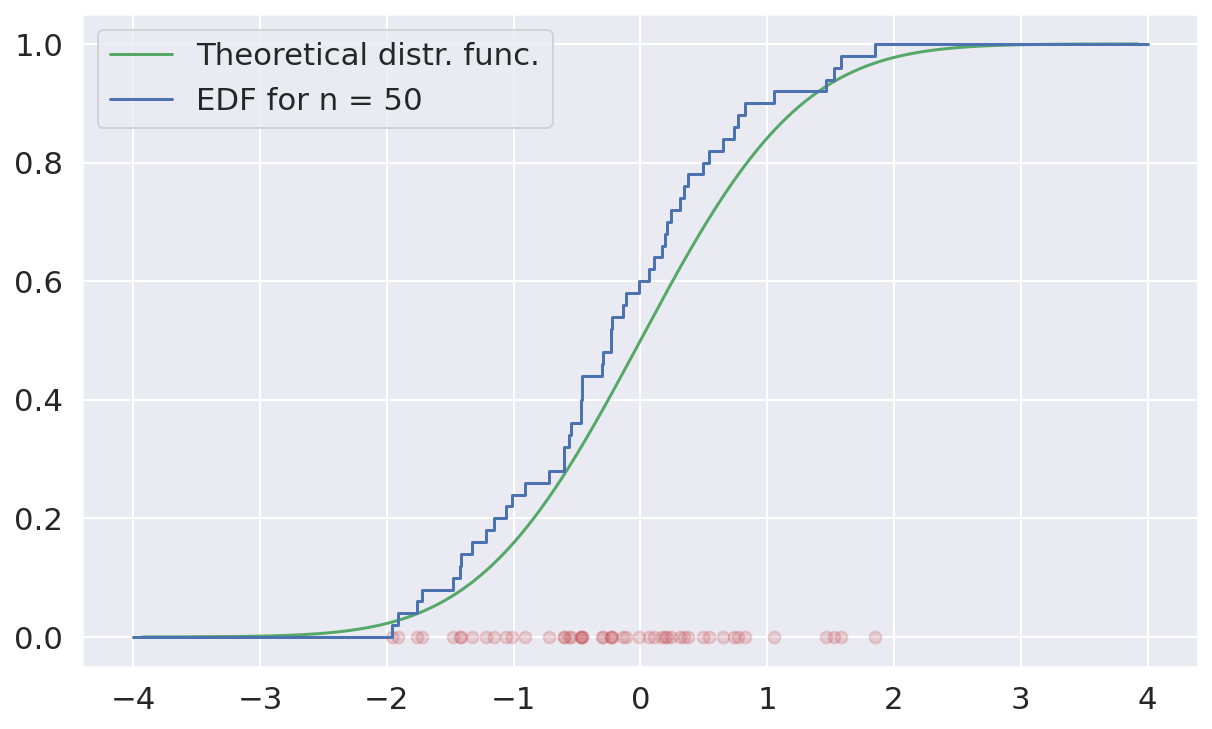

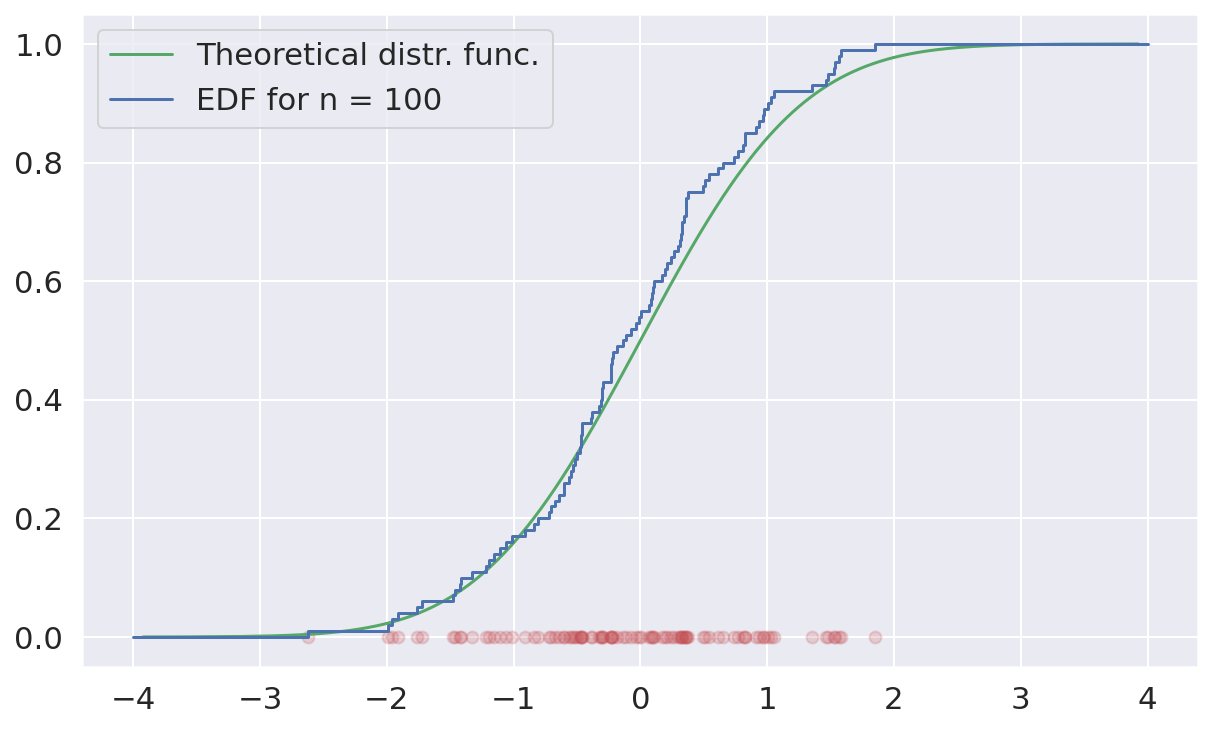

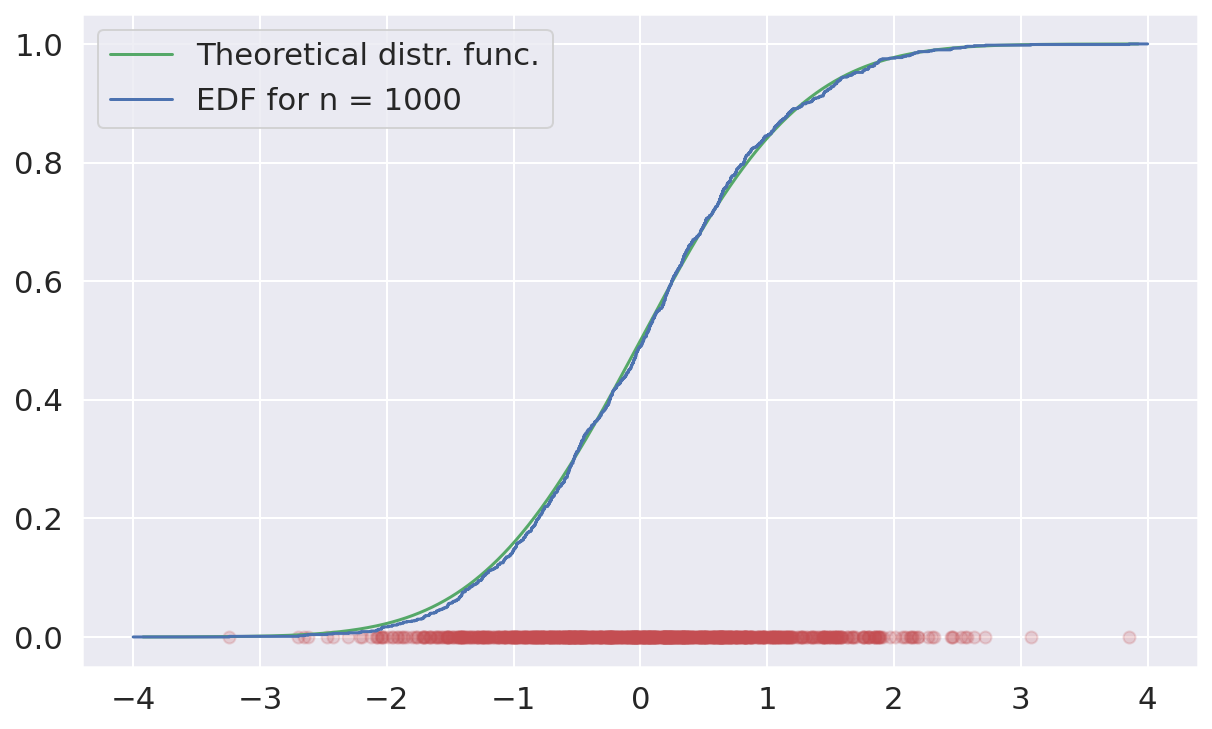

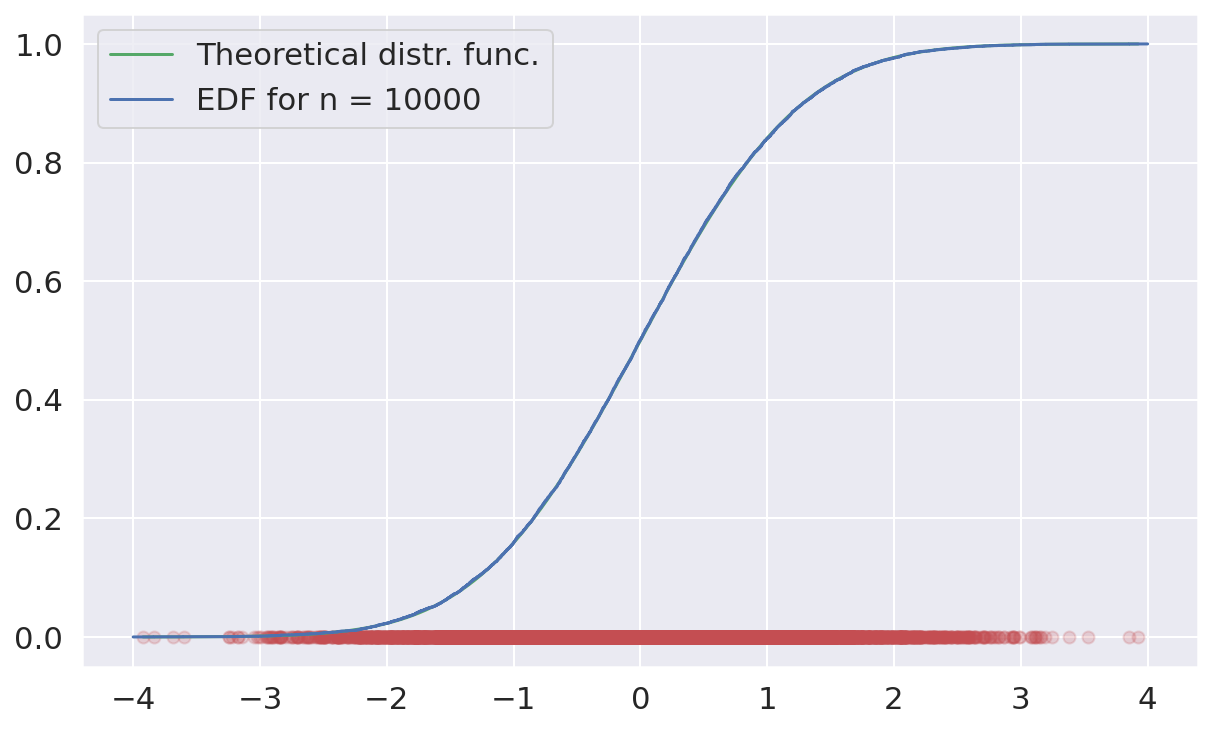

In [16]:
EDF_LEFT_LIMIT = -4
EDF_RIGHT_LIMIT = 4
sorted_norm_sample = np.sort(norm_sample)

for n in [10, 25, 50, 100, 1000, int(N)]:
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_norm_sample, snd_obj.cdf(sorted_norm_sample), 
                color='g', label="Theoretical distr. func.")
    
    edf_x_arr = np.copy(edf_arr[n-1].x)
    edf_x_arr[0] = EDF_LEFT_LIMIT
    edf_x_arr = np.append(edf_x_arr, EDF_RIGHT_LIMIT)
    edf_y_arr = np.append(np.copy(edf_arr[n-1].y), 1)
    
    plt.step(edf_x_arr, edf_y_arr, where='post', label='EDF for n = %d' % n)
    plt.scatter(edf_arr[n-1].x, np.zeros(n+1), alpha=0.2, c='r')
    plt.legend()
    plt.show()

**Вывод:** Экспериментальным путём получили, что с ростом размера выборки эмпирическая функция распределения сходится к самой функции распределения в каждой точке.  
Теоретическим обоснованием этого факта служит **теорема Гливенко-Кантелли**  
Формулировка: https://tvims.nsu.ru/chernova/ms/lec/node6.html

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


*Замечание:* Поскольку эмпирич. ф-ия распр. является ступенчатой функцией, то соответствующий супремум достигается в её точках разрыва  Поэтому достаточно выбрать максимум из модулей отклонения значения ФР в точке скачка и прилегающих значений ЭФР 

In [17]:
# 0     y1     y2 ... y_(n-1)  yn=1 - edf_steps (y0 = 0, y_(n+1) = 1)
#  \   /  \   /          \    /  
#  F(x1)  F(x2) .....    F(xn)      - cdf_values
# To find Dn we need to choose max from |F(xi) - yi| and |F(xi) - y_(i-1)|, 
# where i in range(1, n+1), and |1 - F(xn)|
edf_max_deviation = np.zeros(int(N))

for i in range(int(N)):
    # double_edf_val:   0    y1    y1    y2   ...   y_(n-1)   y_(n-1)  yn=1
    # double_cdf_val: F(x1) F(x1) F(x2) F(x2) ...  F(x_(n-1))  F(xn)   F(xn)
    doubled_edf_val = np.repeat(edf_arr[i].y, 2)[1:-1] 
    doubled_cdf_val = np.repeat(snd_obj.cdf(edf_arr[i].x[1:]), 2) 
    edf_max_deviation[i] = np.max(np.abs(doubled_edf_val - doubled_cdf_val))

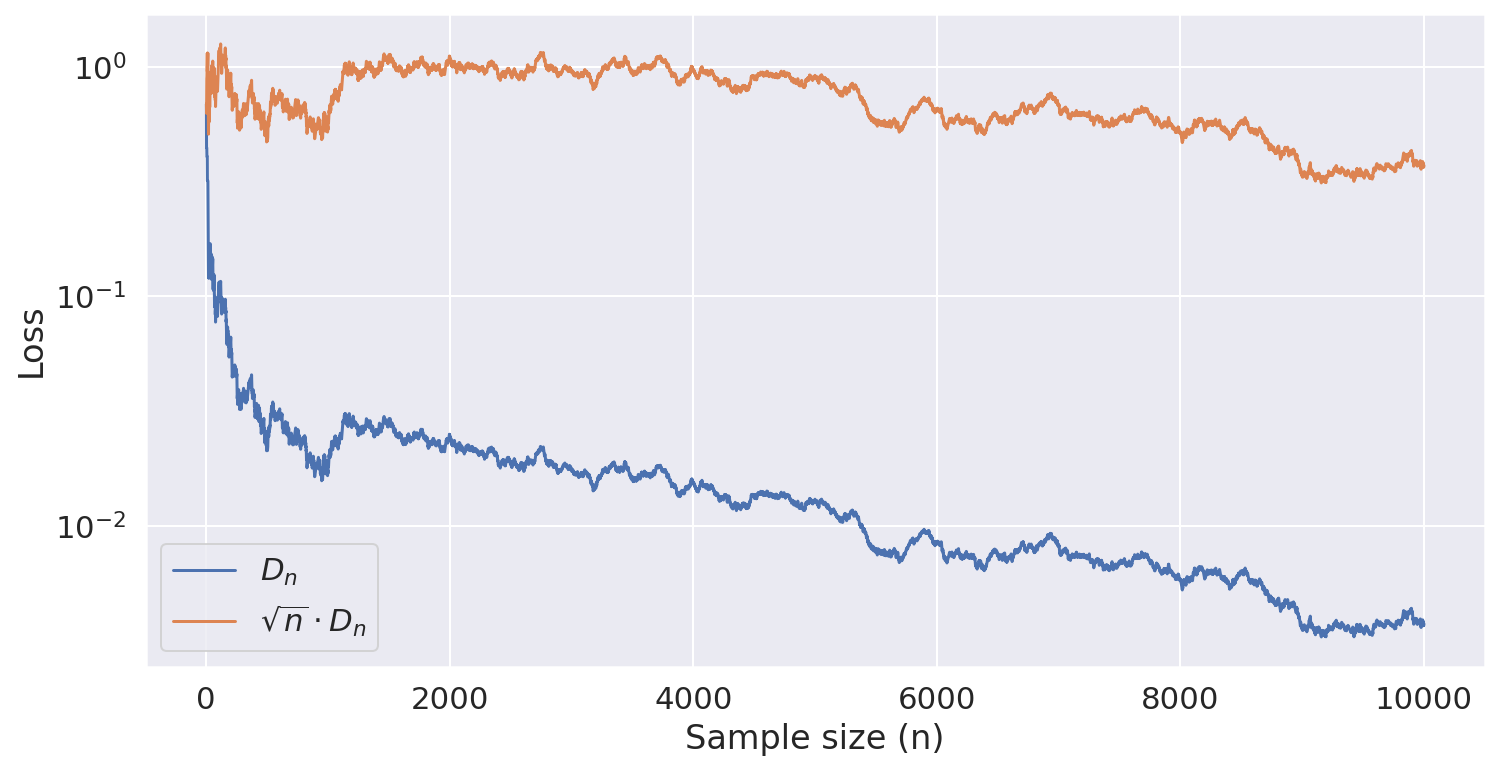

In [18]:
n_arr = np.arange(1, N + 1)

plt.figure(figsize=(12, 6))

plt.plot(n_arr, edf_max_deviation, label="$D_n$")
plt.plot(n_arr, np.sqrt(n_arr)*edf_max_deviation, label="$\\sqrt{n} \\cdot D_n$")

plt.yscale('log')

plt.xlabel("Sample size (n)")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Вывод:** Убедились на практике в справедливости теоремы *Гливенко-Кантелли*, которая утверждает, что $D_n \xrightarrow{п.н.} 0$, причём по теореме *Колмогорова* скорость сходимости составляет $O \left(\dfrac{1}{\sqrt{n}} \right)$

### Задача 4

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [19]:
theta = 1
N_samples = 400
N = 40
N_arr = np.arange(1, N + 1)

bins = [i / 40 + 0.8 for i in range(18)]

N_uniform_samples = sps.uniform(scale=theta).rvs(size=(N_samples, N), random_state=seed)
doubled_means_est = 2 * N_uniform_samples.mean(axis=1)
normed_last_stat_est = N_uniform_samples.max(axis=1) * (N + 1) / N

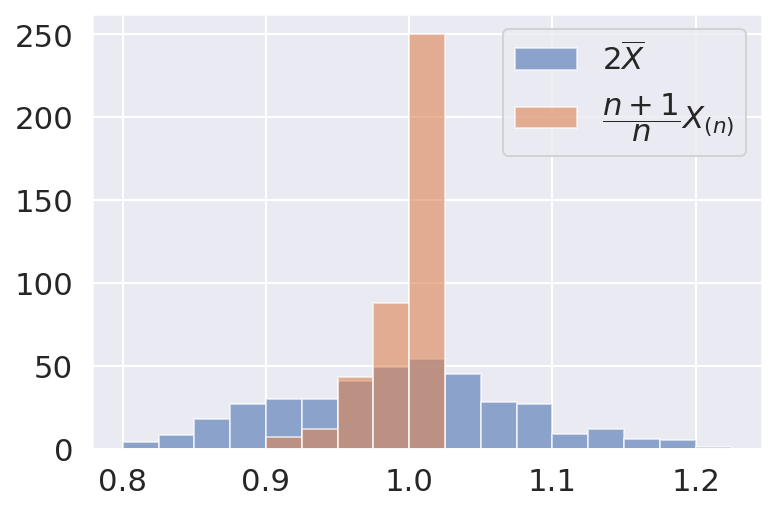

In [20]:
plt.hist(doubled_means_est, bins=bins, alpha=0.6, label="$2\\overline{X}$")
plt.hist(normed_last_stat_est, bins=bins, alpha=0.6, label="$\\dfrac{n+1}{n}X_{(n)}$")
plt.legend()
plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

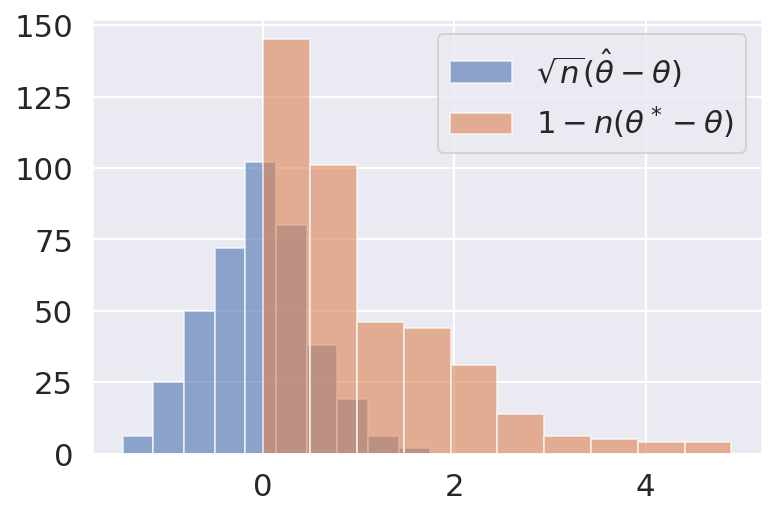

In [21]:
first_estim = np.sqrt(N) * (doubled_means_est - theta)
second_estim = 1 - N * (normed_last_stat_est - theta)

plt.hist(first_estim, alpha=0.6, 
            label="$\sqrt{n} (\hat\\theta - \\theta)$")
plt.hist(second_estim, alpha=0.6, 
            label="$1 - n(\\theta^* - \\theta)$")
plt.legend()
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:** Гистограмма первого распределения похожа на гистограмму стандартного нормального распределения, а гисограмма второго — на гистограмму экспоненциального распределения

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\dfrac{\theta^2}{3}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

/home/eduard/anaconda3/envs/python/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/tmp/ipykernel_43216/2138658807.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


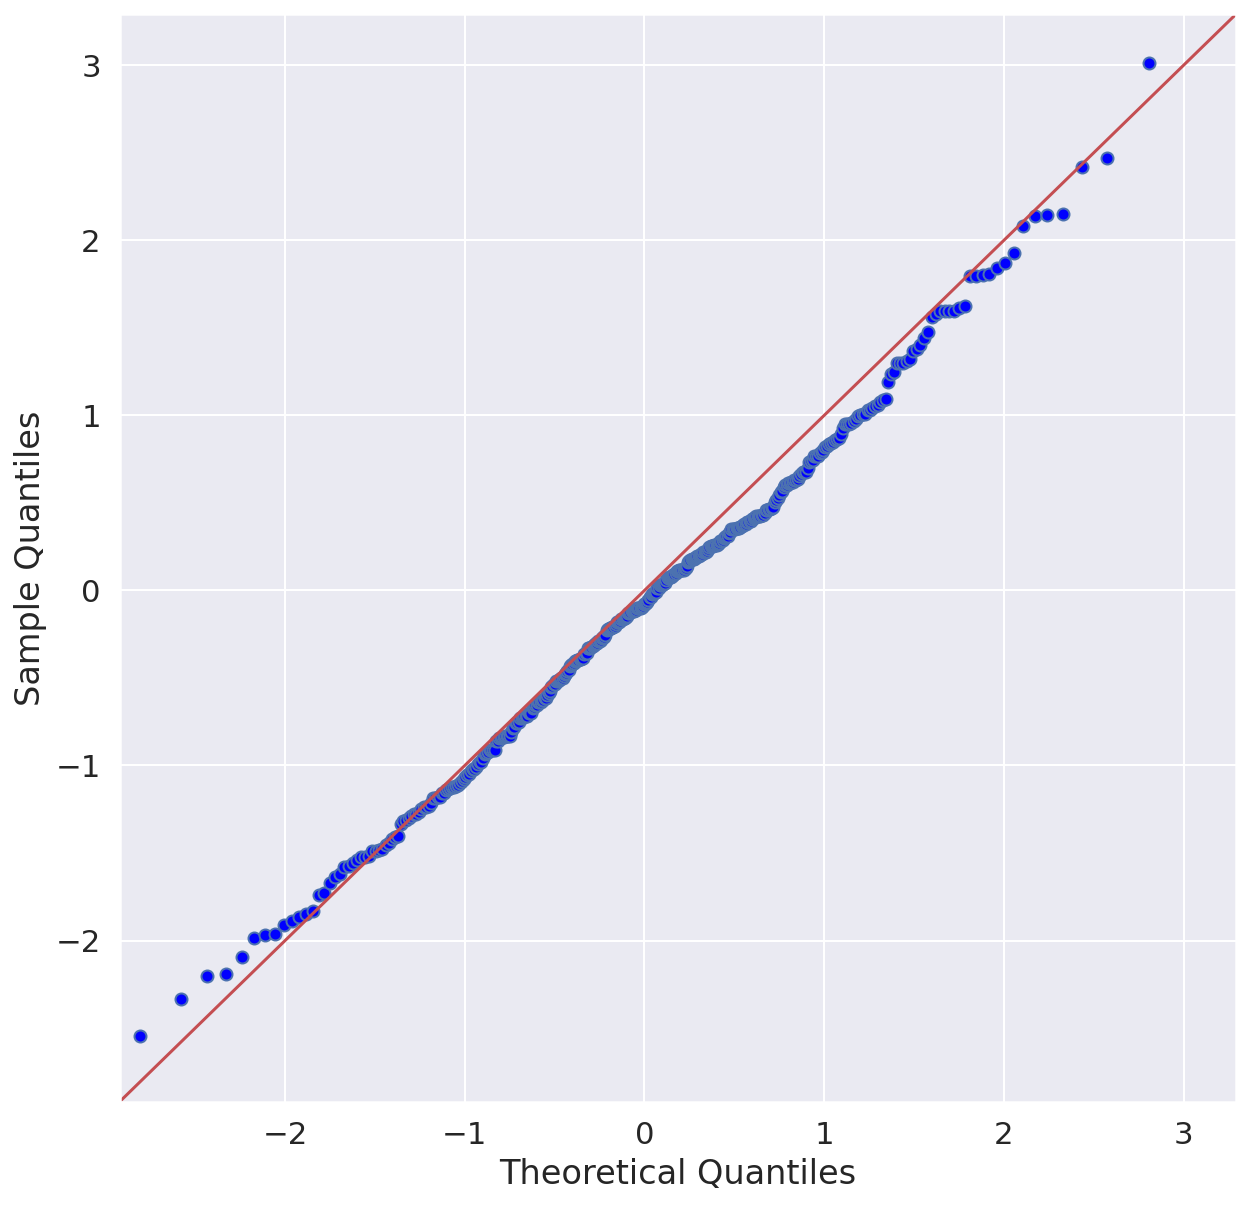

In [22]:
import statsmodels.api as sm


theta_norm = np.sqrt(N) * (doubled_means_est - 1) / (theta / np.sqrt(3))
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** Поскольку значения выборки лежат вдоль прямой, то можно полагать, что выборка взята из станд. норм. распределения

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** Экспоненциальное с параметром 1, так как данная статистика как раз сходится по распределению к $\xi \sim Exp(1)$ (проверяется через т.Александрова)

/home/eduard/anaconda3/envs/python/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/tmp/ipykernel_43216/1741503934.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


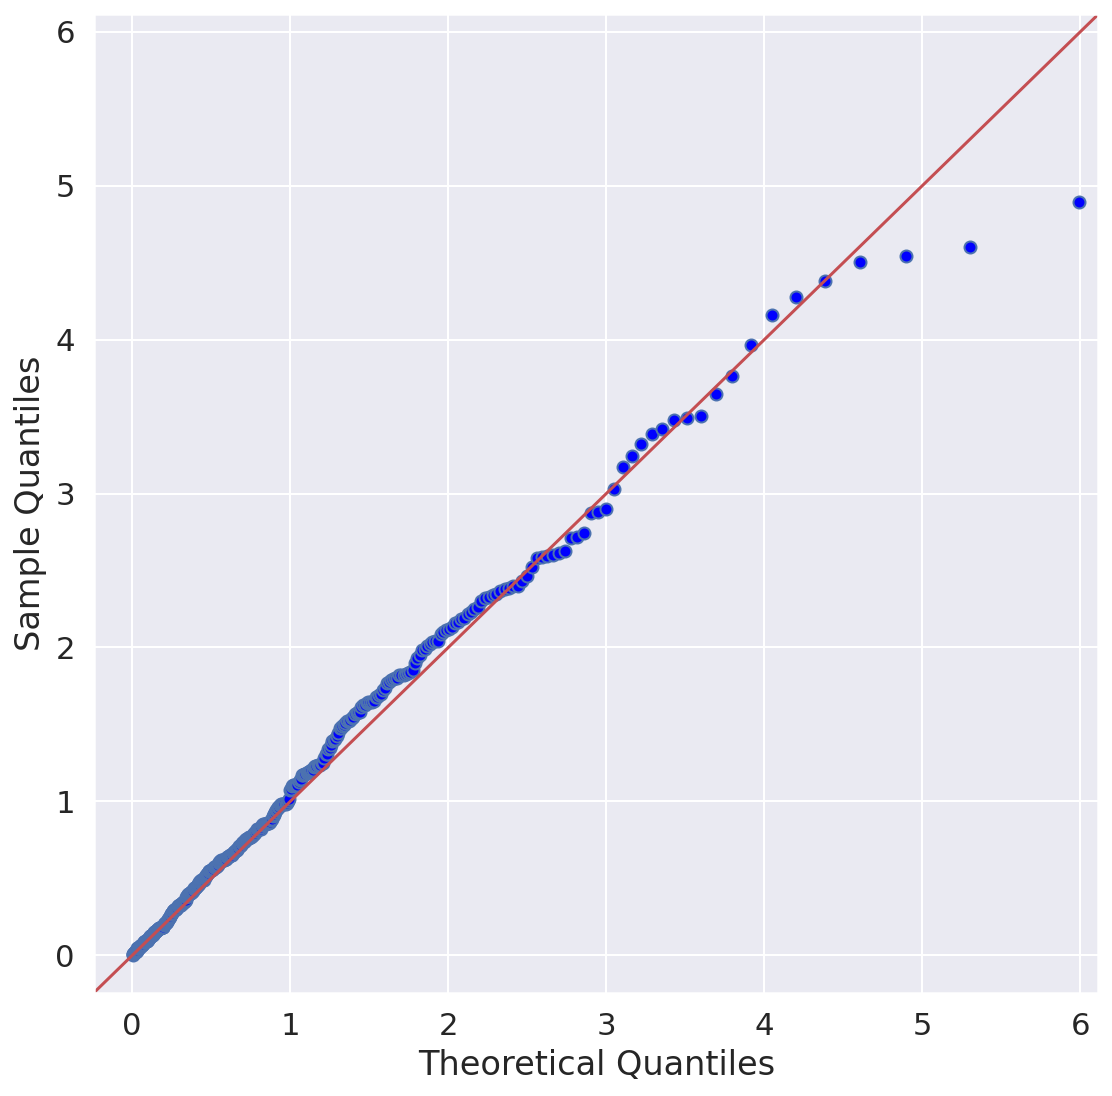

In [23]:
fig, ax = plt.subplots(figsize=(9, 9))
sm.qqplot(second_estim, sps.expon(), line='45', ax=ax)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** Ввиду асимптотической нормальности оценки $\hat{\theta} = 2\overline{X}$ получаем, что скорость сх-ти к параметру $\theta$ составляет $O\left( \dfrac{1}{\sqrt{n}} \right)$

В то же время из сходимости по распределению статистики $\theta - n  (\theta^* - \theta)$ к $\xi \sim Exp\left( \dfrac{1}{\theta} \right)$ получаем, что скорость сх-ти $\theta^*$ составляет $O\left( \dfrac{1}{n} \right)$

Таким образом, можно сделать вывод о том, что оценка $\theta^*$ "выгоднее" оценки $\hat{\theta}$

## Важно

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.